In [1]:
import pandas as pd
import uproot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import time
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc
from sklearn.utils import shuffle
import matplotlib
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
import sklearn.metrics

## Реальные данные

In [2]:
data_real = pd.read_csv('/Users/zaret/Desktop/gerda/ANG5_cal.csv')
data_real.drop(data_real.columns[[0]], axis  =1, inplace = True)

data_real = data_real.reset_index()
data_real.drop(data_real.columns[[0]], axis  =1, inplace = True)

In [3]:
data_real = data_real.drop('integral', axis = 1)

for i in range (1,49):
    data_real.drop('integral'+str(i), axis = 1, inplace = True)
    
data_real.drop('derivative49', axis = 1, inplace = True)

In [4]:
data_real

,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,TimeAtHeightX11,...,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48,label
0,0.140442,0.181663,0.209801,0.233267,0.253996,0.272972,0.290272,0.306565,0.322181,0.337019,...,1.232161,1.138185,1.016946,0.911109,0.814092,0.717761,0.632560,0.550645,0.458908,1
1,0.045344,0.081330,0.112907,0.140417,0.163945,0.185058,0.205364,0.225947,0.247246,0.269007,...,1.798480,1.728344,1.640512,1.447694,1.275357,1.052312,0.801276,0.520466,0.368492,0
2,0.038847,0.068367,0.092965,0.114875,0.136888,0.162010,0.192348,0.225346,0.258546,0.291481,...,1.940569,1.852802,1.768690,1.666881,1.524020,1.316278,1.020917,0.678320,0.434029,0
3,0.040791,0.058287,0.071423,0.082283,0.092036,0.101343,0.110134,0.118823,0.127419,0.135995,...,0.733304,0.741351,0.778511,0.835892,0.851137,0.804447,0.686255,0.485640,0.154488,0
4,0.060938,0.121147,0.198562,0.247046,0.276288,0.299460,0.320231,0.339979,0.359977,0.381197,...,2.579212,2.353233,2.139429,1.917933,1.585219,1.194586,0.811448,0.355208,0.378494,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81597,0.138779,0.191703,0.233328,0.270243,0.302877,0.331684,0.358398,0.382190,0.404193,0.426089,...,3.161253,3.136122,2.765124,2.580866,2.261544,1.787825,1.371110,0.813244,0.355669,1
81598,0.028672,0.058089,0.087452,0.113082,0.136296,0.161095,0.195494,0.240446,0.272500,0.300394,...,1.570048,1.461895,1.384431,1.343391,1.294644,1.189558,0.993786,0.752401,0.462721,1
81599,0.033797,0.064744,0.093734,0.122582,0.157026,0.204316,0.243169,0.269953,0.292775,0.313781,...,2.390365,2.306132,2.193407,2.018752,1.885632,1.708488,1.457672,1.104693,0.593630,1
81600,0.029680,0.047934,0.061086,0.072907,0.081959,0.091011,0.099646,0.106860,0.114075,0.121290,...,1.117350,1.105849,1.086196,1.055546,1.017692,0.892110,0.751582,0.541277,0.096558,1


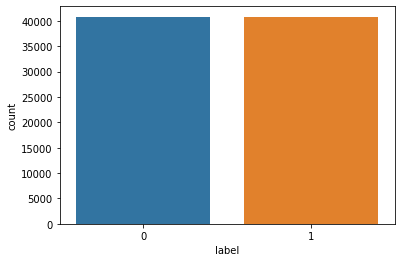

In [5]:
sns.countplot('label', data = data_real)

## Синтезированные данные

In [6]:
data_gen = pd.read_csv('example.csv')
data_gen.drop(data_gen.columns[[0]], axis  =1, inplace = True)

data_gen = data_gen.reset_index()
data_gen.drop(data_gen.columns[[0]], axis  =1, inplace = True)

In [7]:
data_gen.drop('TimeAtHeightX1', axis = 1, inplace = True)
data_gen.drop('TimeAtHeightX50', axis = 1, inplace = True)

In [8]:
data_gen

,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,TimeAtHeightX11,...,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48,label
0,0.044361,0.095117,0.158157,0.213047,0.257228,0.296225,0.325614,0.346224,0.363044,0.378235,...,3.052496,2.948297,2.712170,2.439880,2.268714,2.040135,1.662041,1.323110,0.845058,1
1,0.008589,0.014430,0.018910,0.022891,0.026594,0.030119,0.033327,0.036419,0.039544,0.042679,...,3.082330,2.710328,2.283024,1.732488,1.506395,1.236028,0.805763,0.359455,0.260226,1
2,0.041737,0.073801,0.103252,0.133073,0.162863,0.190822,0.218377,0.245883,0.271225,0.294935,...,2.243307,2.144865,1.960321,1.797387,1.512727,1.254023,0.968580,0.702520,0.455818,1
3,0.036833,0.059463,0.077316,0.093439,0.107795,0.121003,0.133391,0.145389,0.157362,0.168961,...,1.163360,1.039595,0.928542,0.845879,0.688672,0.559020,0.484084,0.401463,0.288967,1
4,0.044630,0.072822,0.097708,0.121547,0.146484,0.174410,0.204121,0.236338,0.267417,0.296698,...,1.969109,1.822022,1.582219,1.359921,1.206870,0.890646,0.585812,0.350209,0.344486,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111235,0.035990,0.058350,0.077057,0.094282,0.111318,0.127929,0.144589,0.161491,0.179448,0.198949,...,1.665404,1.538333,1.444352,1.314600,1.227529,1.073831,0.935907,0.698844,0.356494,0
111236,0.036452,0.059447,0.077652,0.094275,0.110435,0.126432,0.142379,0.157990,0.173635,0.188613,...,1.062692,0.933718,0.827422,0.738681,0.643670,0.559041,0.497756,0.475284,0.439610,0
111237,0.045551,0.075094,0.099289,0.120287,0.139726,0.157824,0.175347,0.191973,0.208276,0.224162,...,0.780026,0.734883,0.696725,0.715136,0.731703,0.715519,0.677008,0.628817,0.448906,0
111238,0.017389,0.033395,0.048352,0.064819,0.082793,0.103359,0.125756,0.144527,0.162204,0.178808,...,1.139093,1.073319,1.094798,1.112963,1.123584,1.040938,0.801556,0.524891,0.527781,0


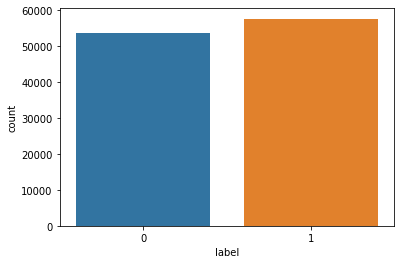

In [9]:
sns.countplot('label', data = data_gen)

## Построение гистограмм, чтобы проверить соответствие синтезированных данных реальным

In [10]:
sig_cal = data_real[data_real['label']==1]
bkg_cal = data_real[data_real['label']==0]

In [11]:
sig_cal = sig_cal.drop('label', axis = 1)
bkg_cal = bkg_cal.drop('label', axis = 1)

In [12]:
sig_gen = data_gen[data_gen['label']==1]
bkg_gen = data_gen[data_gen['label']==0]

sig_gen = sig_gen.drop('label', axis = 1)
bkg_gen = bkg_gen.drop('label', axis = 1)

In [13]:
print(sig_cal.shape)
print(sig_gen.shape)

(40801, 96)
(57632, 96)


In [14]:
bkg_gen

,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,TimeAtHeightX11,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
57632,0.055755,0.076683,0.092382,0.106367,0.119486,0.131421,0.142509,0.152799,0.162801,0.172080,...,1.341480,1.108015,0.963341,0.851557,0.728231,0.745526,0.765684,0.696833,0.438576,0.325764
57633,0.042080,0.093228,0.156693,0.230887,0.300032,0.356330,0.402715,0.440541,0.469483,0.492861,...,3.253283,3.156752,2.940739,2.739847,2.509943,2.219859,1.886252,1.463405,0.995985,0.592167
57634,0.040712,0.070616,0.095890,0.119650,0.144593,0.169713,0.195024,0.220563,0.244365,0.266743,...,1.464000,1.396569,1.320005,1.219670,1.119516,1.030749,0.919434,0.807540,0.561128,0.263045
57635,0.031284,0.054888,0.076290,0.097045,0.118441,0.139524,0.160930,0.182433,0.204800,0.227236,...,1.836224,1.794466,1.758959,1.632497,1.473877,1.335050,1.126868,0.872168,0.609061,0.314758
57636,0.029833,0.050225,0.067967,0.085364,0.102253,0.120901,0.140940,0.161643,0.180954,0.200077,...,1.471892,1.361169,1.091597,1.056423,1.110703,1.084438,0.958549,0.760913,0.599987,0.789555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111235,0.035990,0.058350,0.077057,0.094282,0.111318,0.127929,0.144589,0.161491,0.179448,0.198949,...,1.794986,1.665404,1.538333,1.444352,1.314600,1.227529,1.073831,0.935907,0.698844,0.356494
111236,0.036452,0.059447,0.077652,0.094275,0.110435,0.126432,0.142379,0.157990,0.173635,0.188613,...,1.170551,1.062692,0.933718,0.827422,0.738681,0.643670,0.559041,0.497756,0.475284,0.439610
111237,0.045551,0.075094,0.099289,0.120287,0.139726,0.157824,0.175347,0.191973,0.208276,0.224162,...,0.809259,0.780026,0.734883,0.696725,0.715136,0.731703,0.715519,0.677008,0.628817,0.448906
111238,0.017389,0.033395,0.048352,0.064819,0.082793,0.103359,0.125756,0.144527,0.162204,0.178808,...,1.011657,1.139093,1.073319,1.094798,1.112963,1.123584,1.040938,0.801556,0.524891,0.527781


### Signal

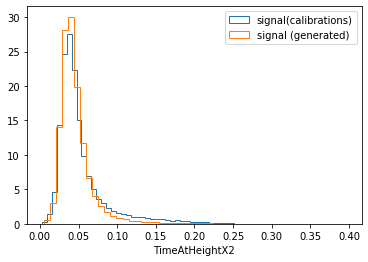

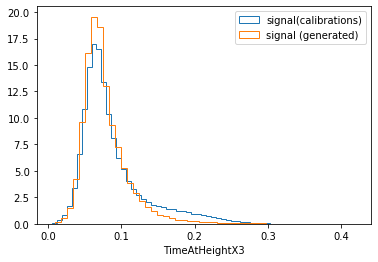

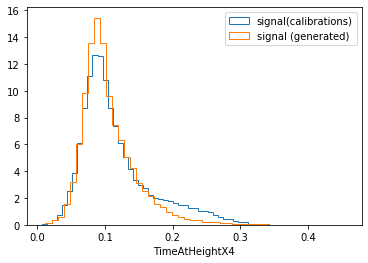

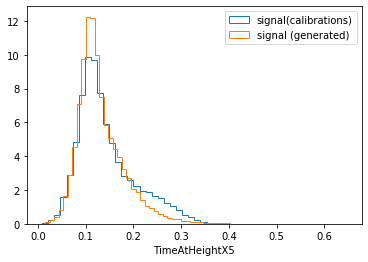

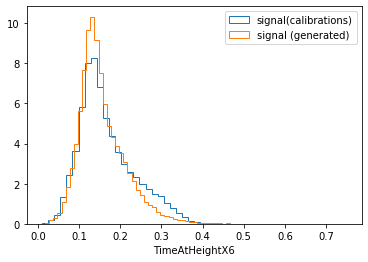

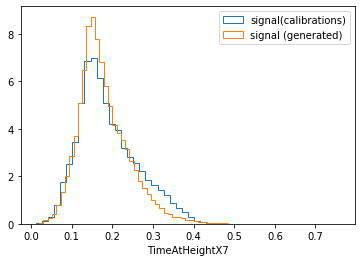

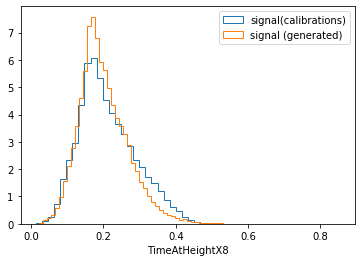

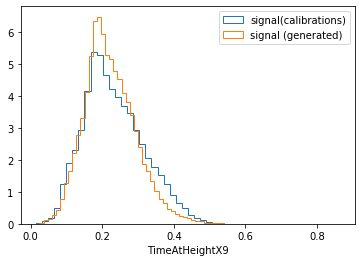

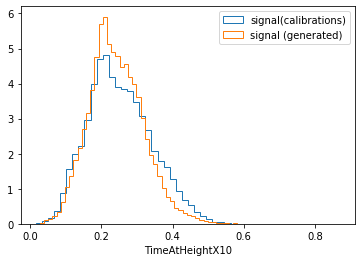

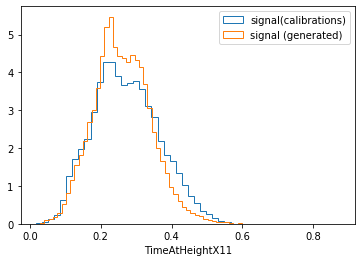

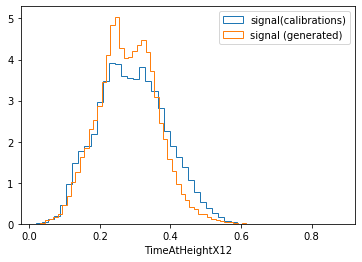

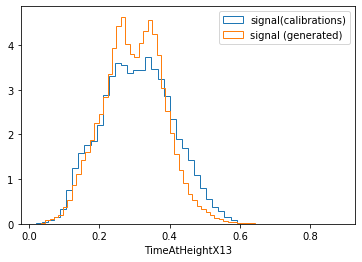

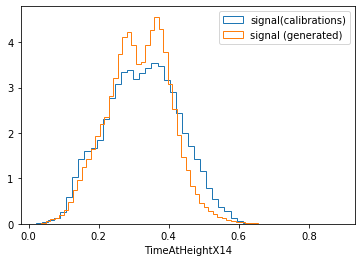

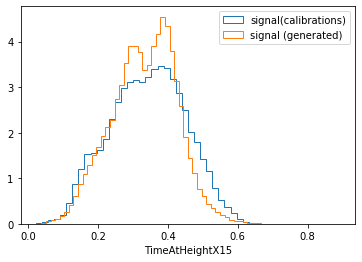

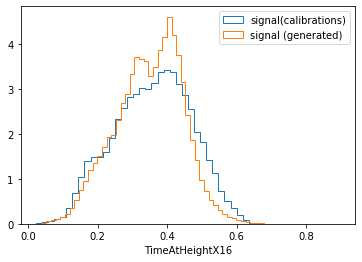

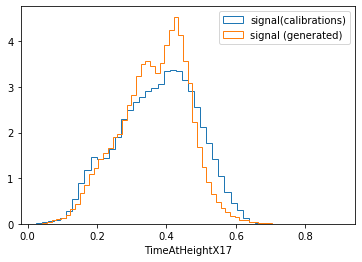

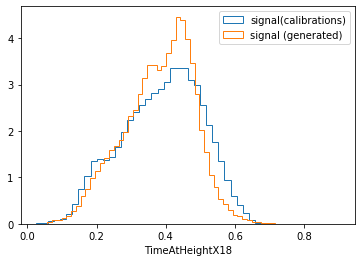

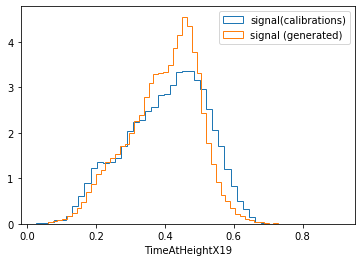

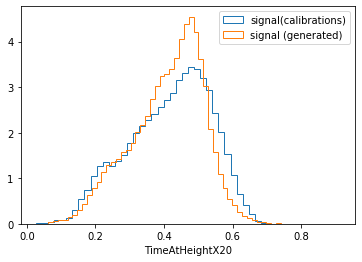

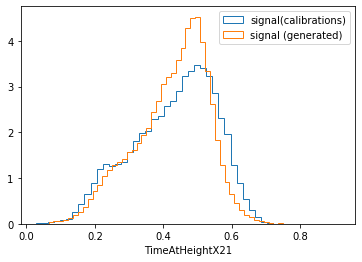

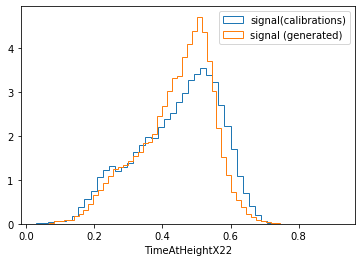

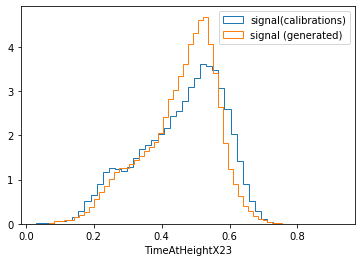

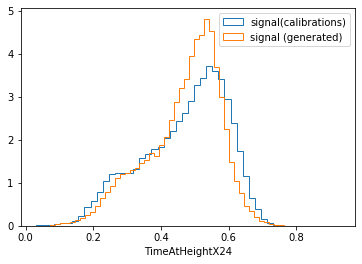

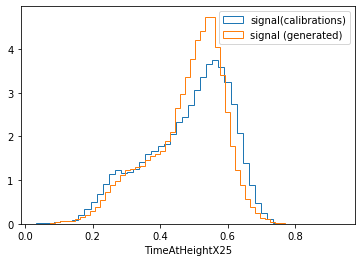

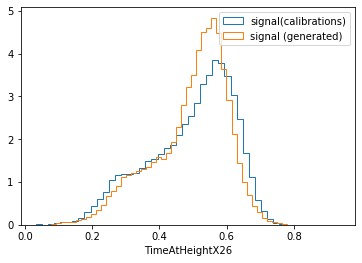

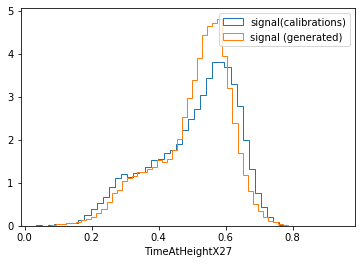

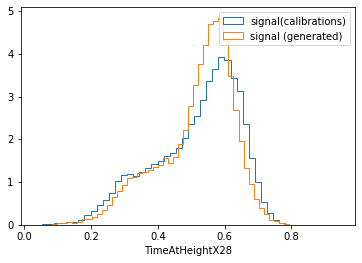

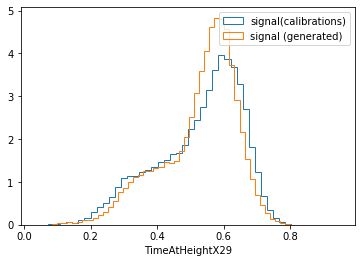

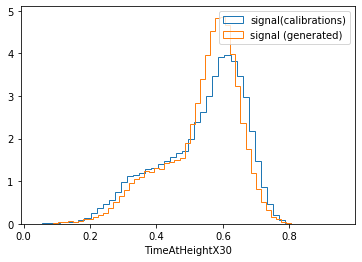

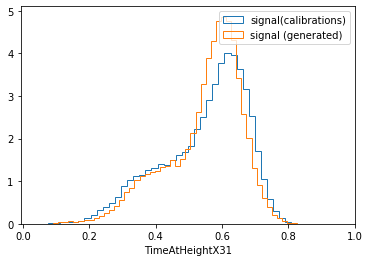

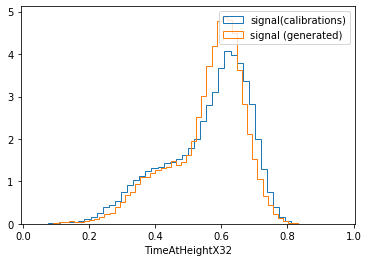

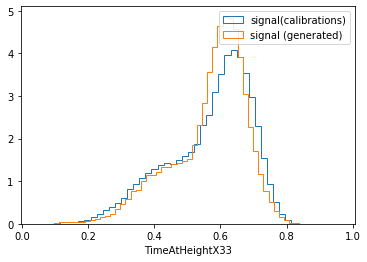

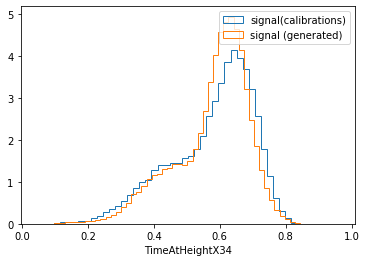

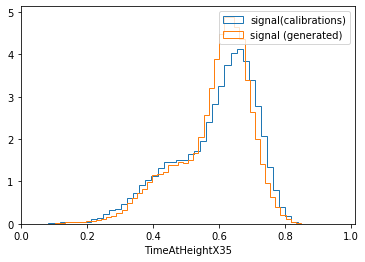

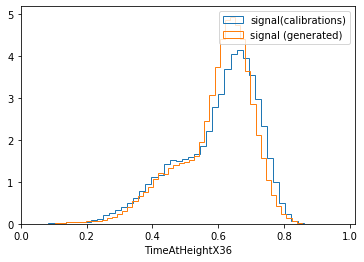

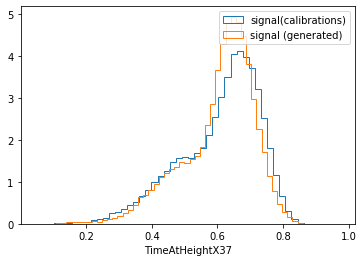

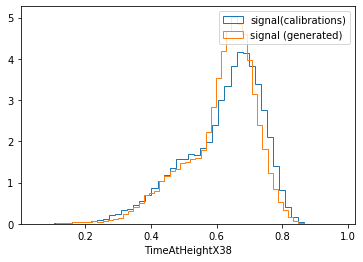

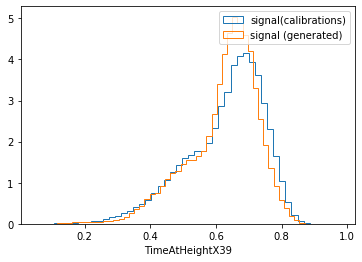

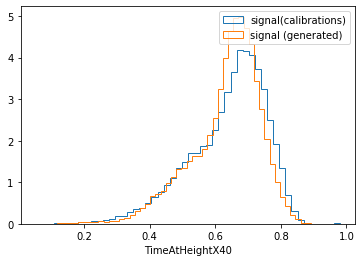

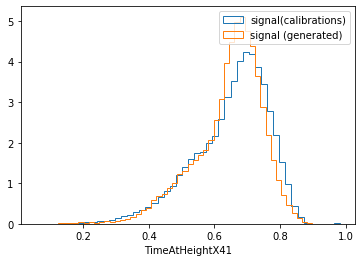

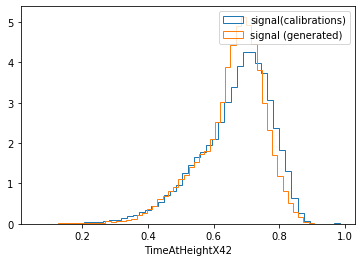

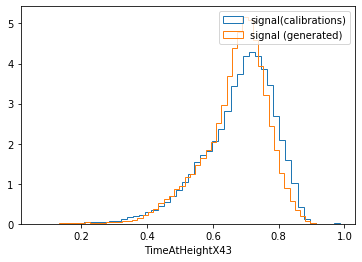

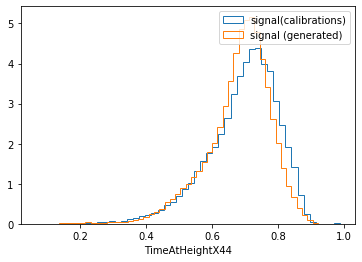

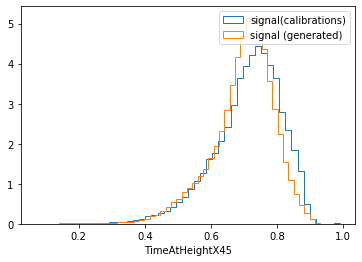

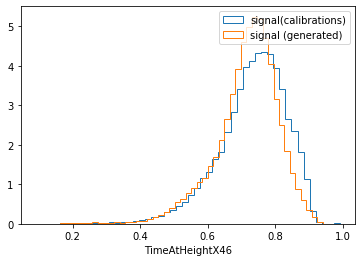

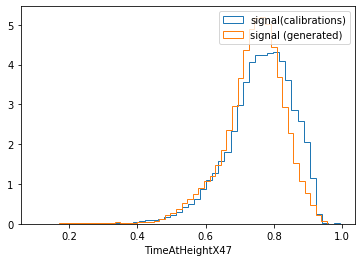

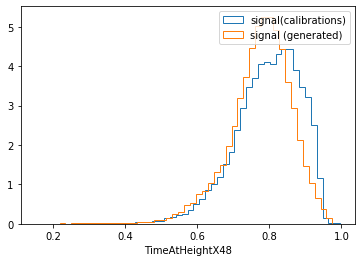

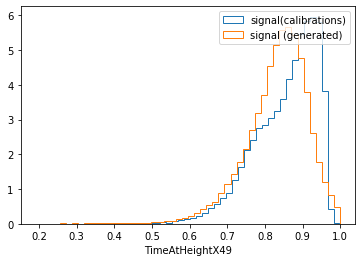

In [19]:
string = 'TimeAtHeightX'
for i in range(2,50):

    x1=sig_cal[string+str(i)]
    x2 =sig_gen[string+str(i)]

    plt.hist(x1, bins = 50, label='signal(calibrations)', histtype = 'step', density=True)
    plt.hist(x2, bins = 50, label = 'signal (generated)', histtype = 'step',density=True)
    plt.legend()
    plt.xlabel(string+str(i))
    plt.show()
    

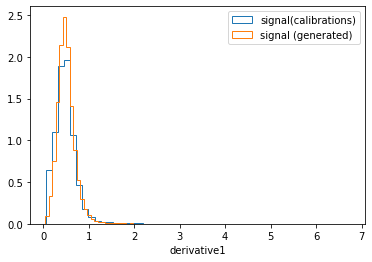

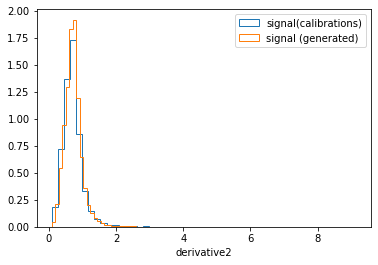

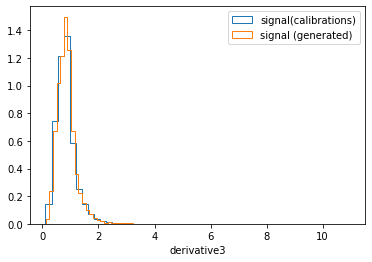

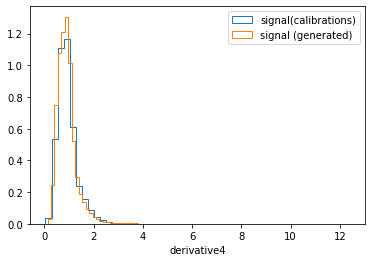

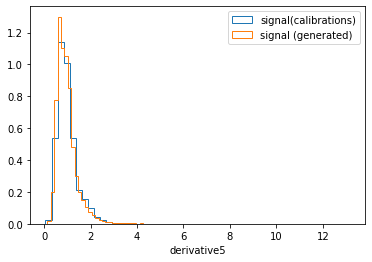

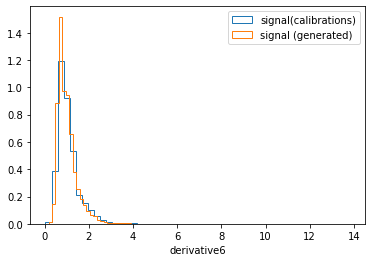

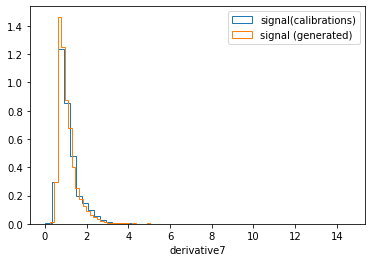

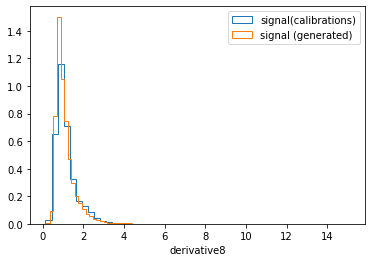

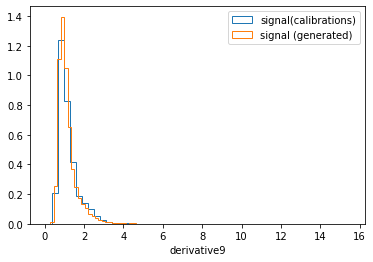

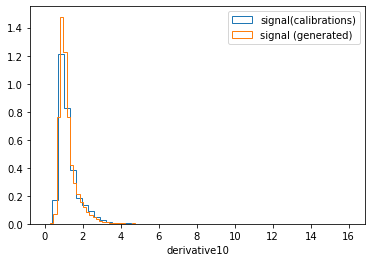

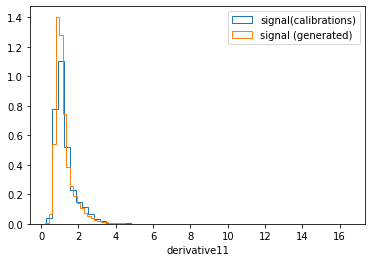

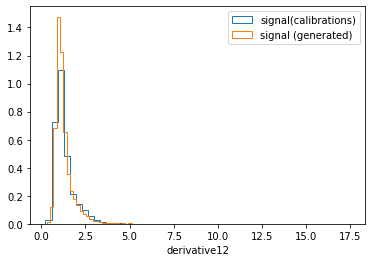

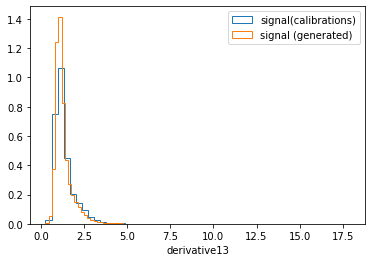

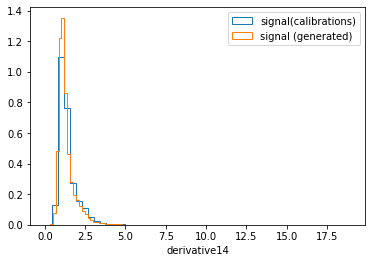

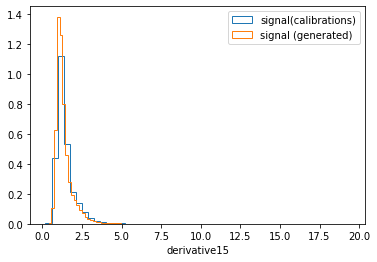

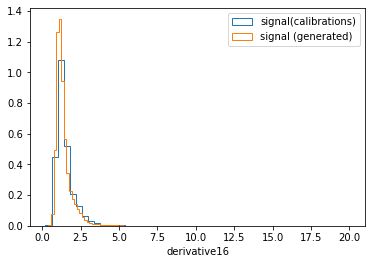

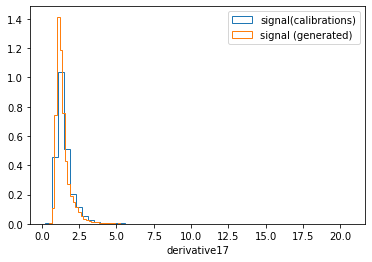

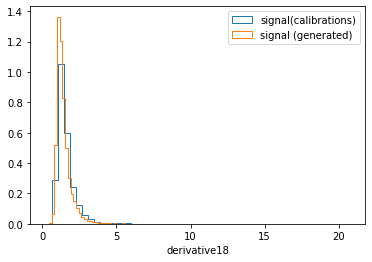

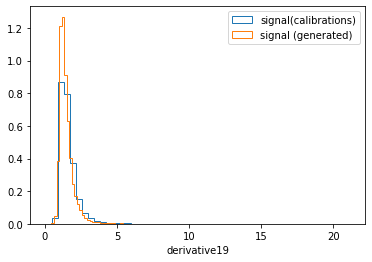

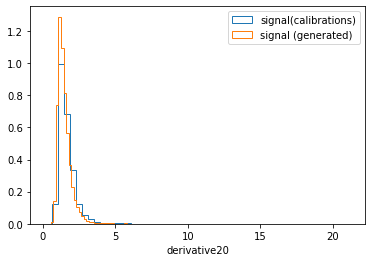

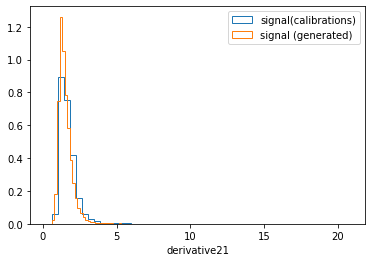

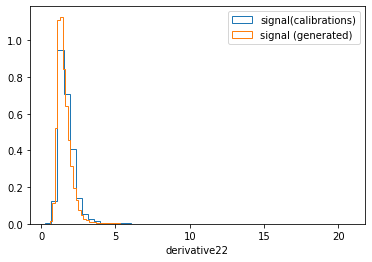

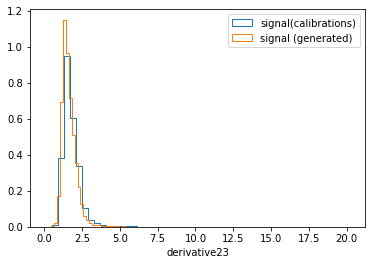

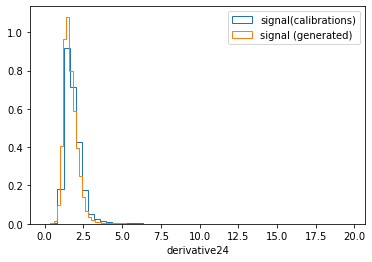

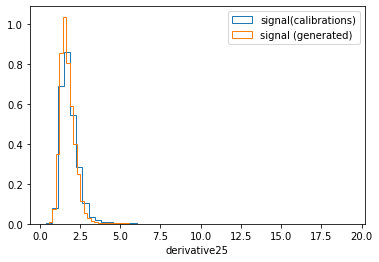

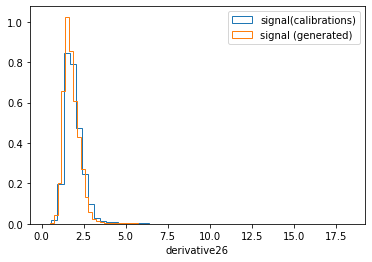

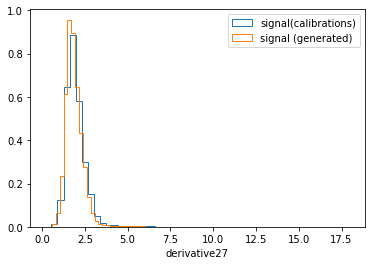

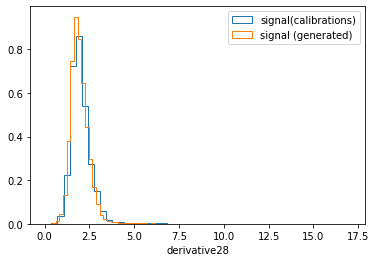

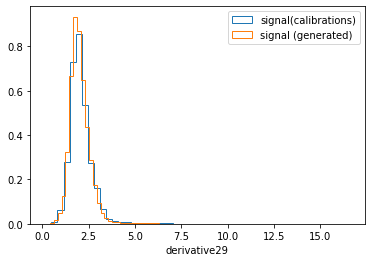

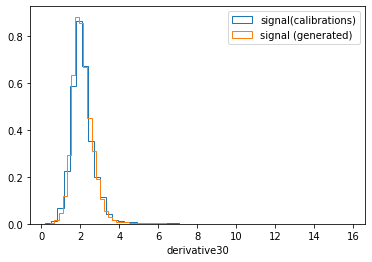

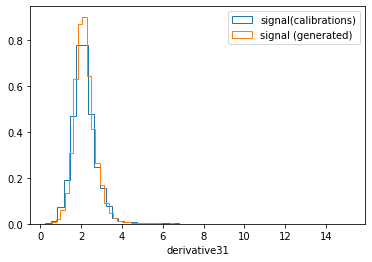

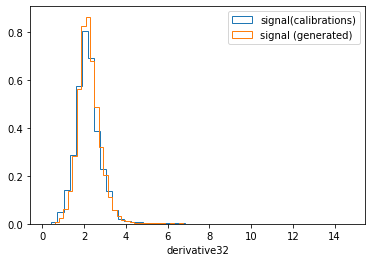

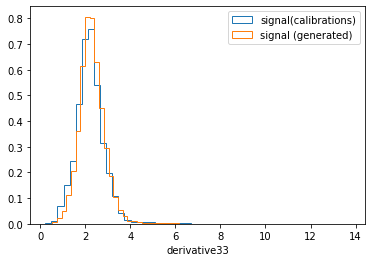

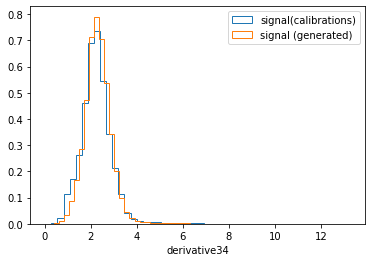

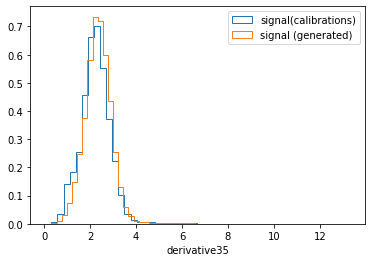

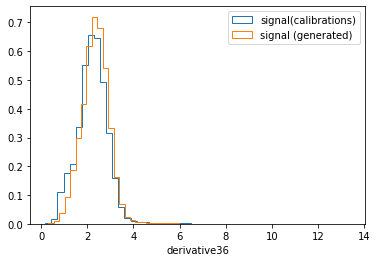

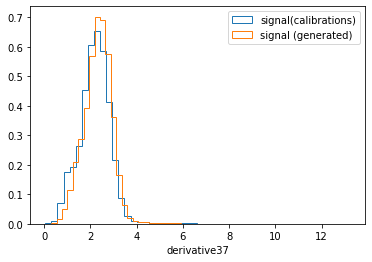

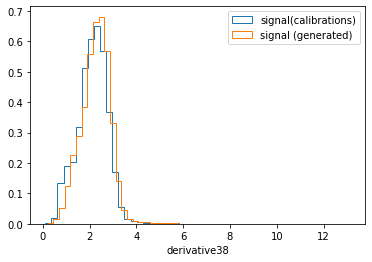

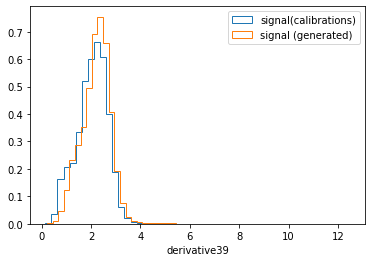

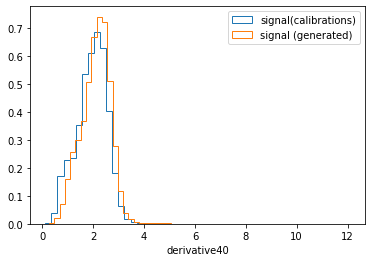

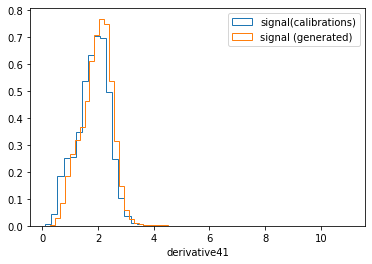

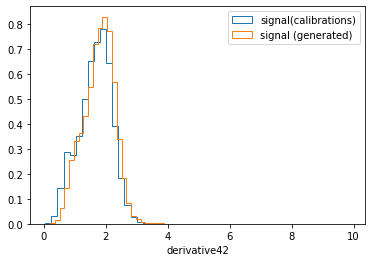

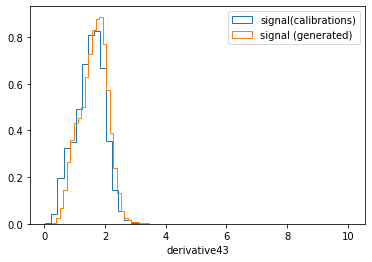

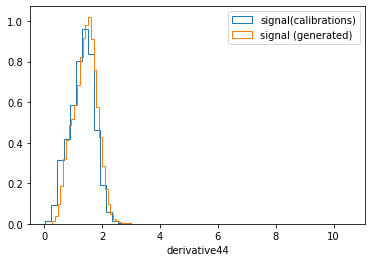

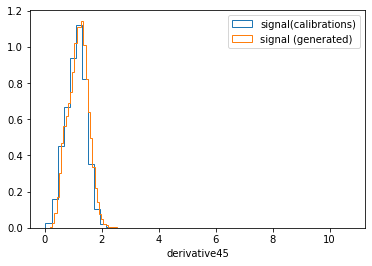

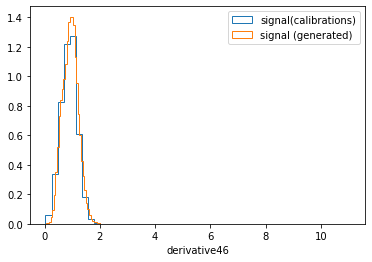

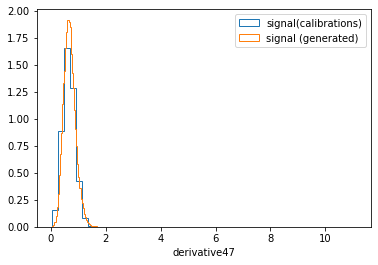

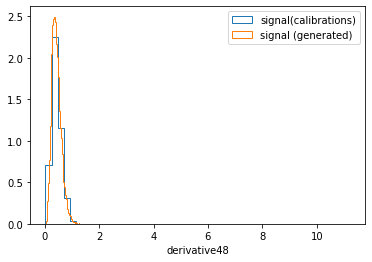

In [20]:
string = 'derivative'
for i in range(1,49):

    x1=sig_cal[string+str(i)]
    x2 =sig_gen[string+str(i)]

    plt.hist(x1, bins = 50, label='signal(calibrations)', histtype = 'step', density=True)
    plt.hist(x2, bins = 50, label = 'signal (generated)', histtype = 'step',density=True)
    plt.legend()
    plt.xlabel(string+str(i))
    plt.show()

### Background

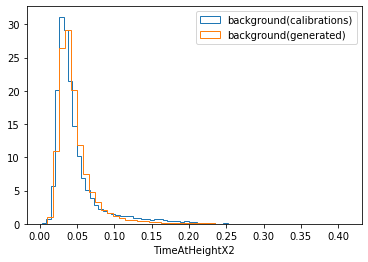

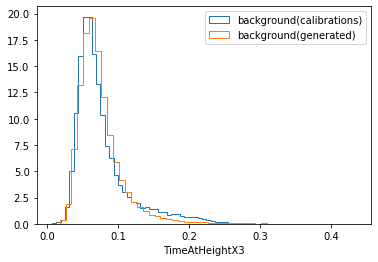

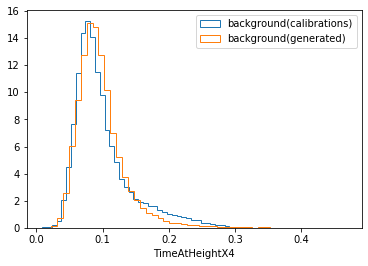

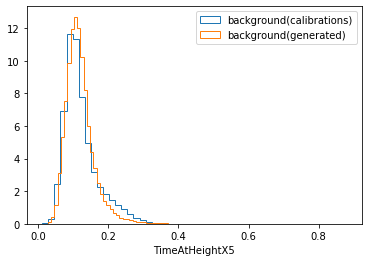

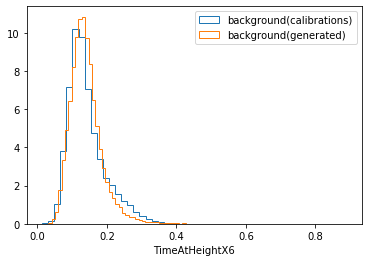

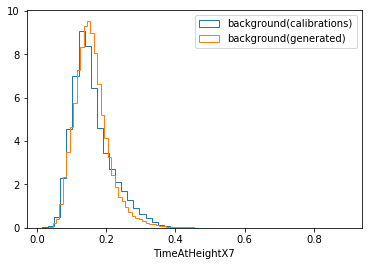

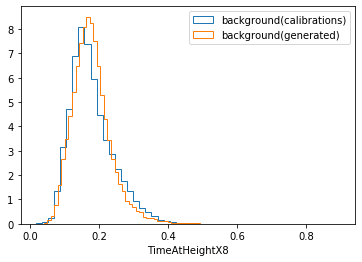

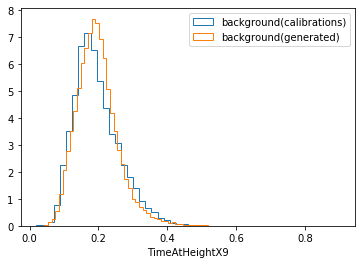

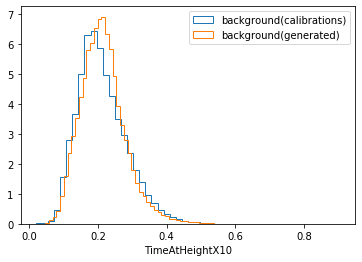

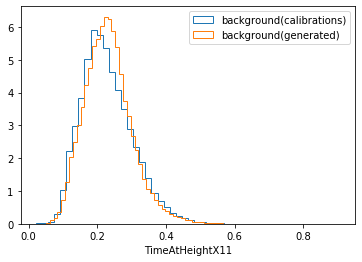

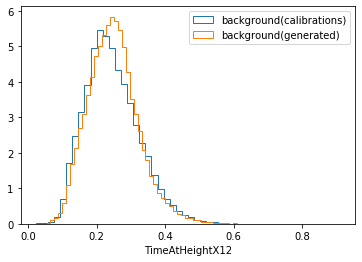

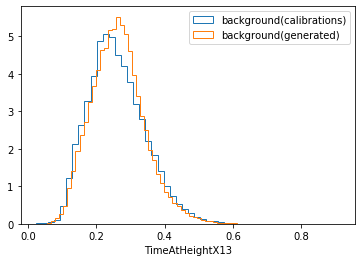

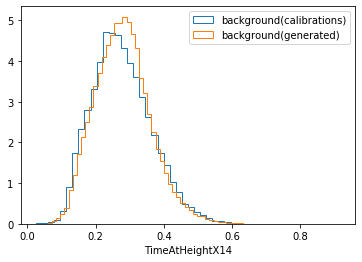

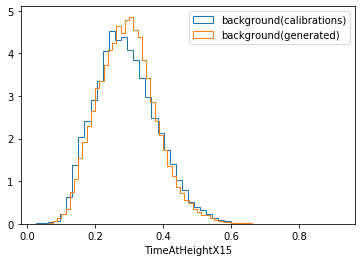

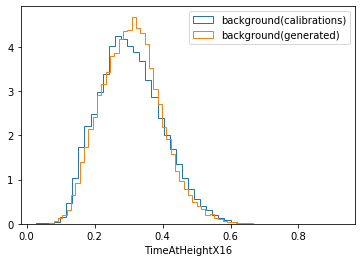

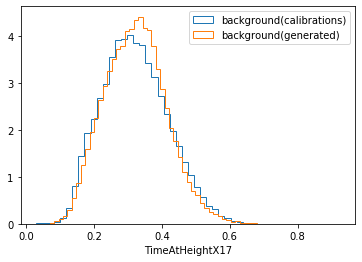

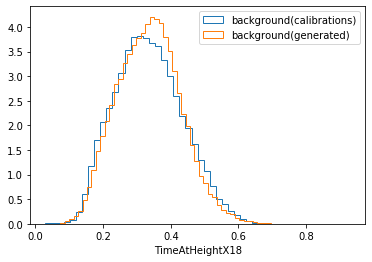

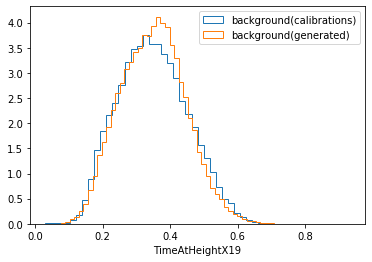

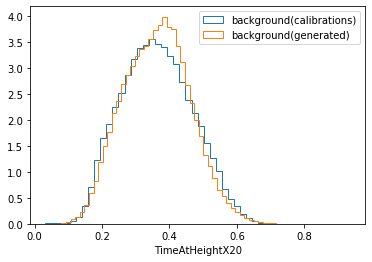

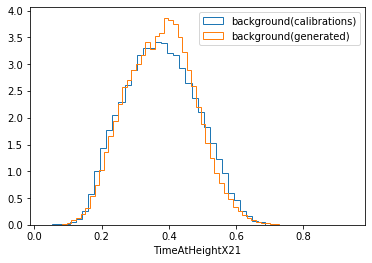

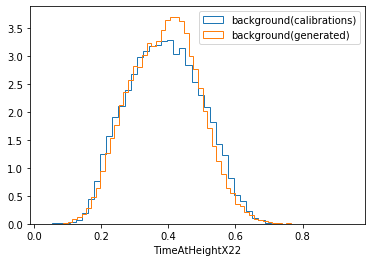

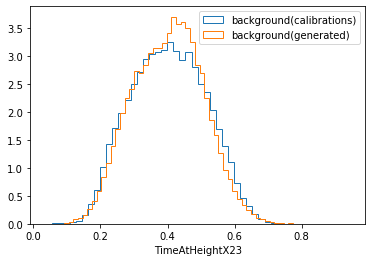

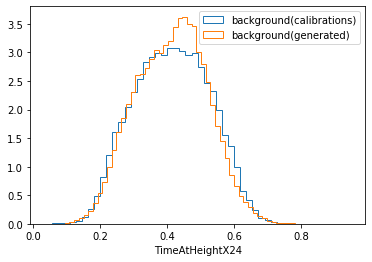

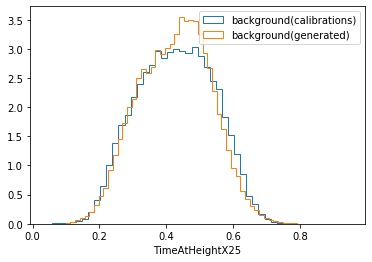

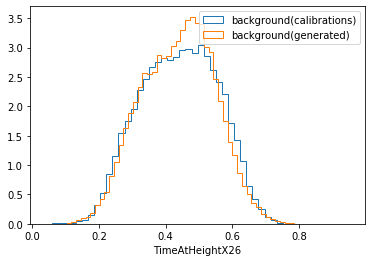

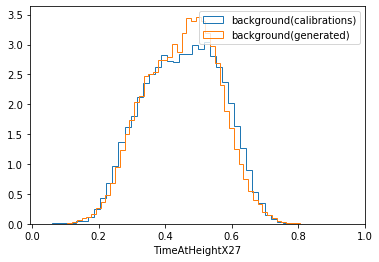

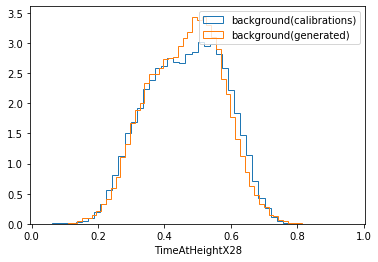

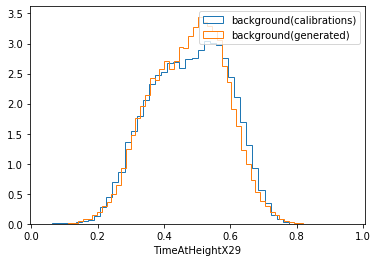

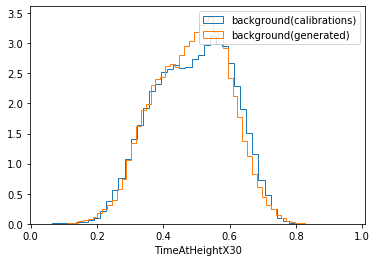

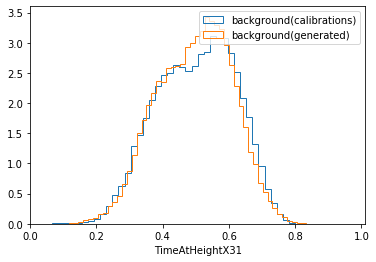

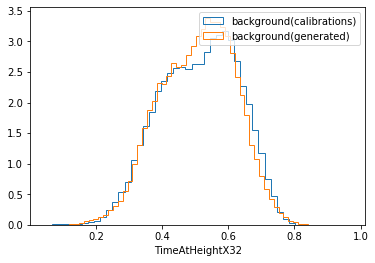

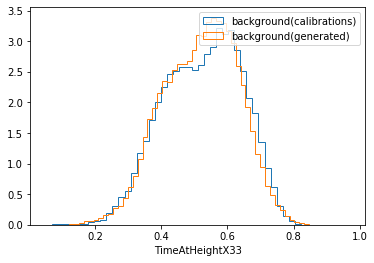

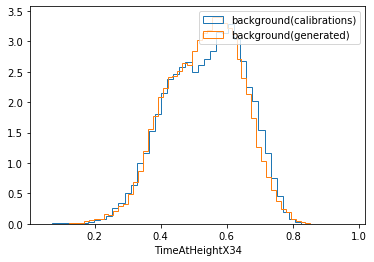

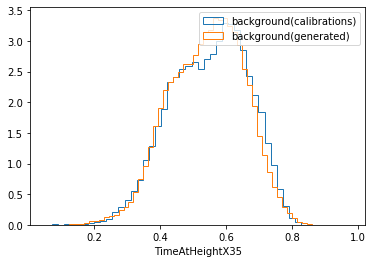

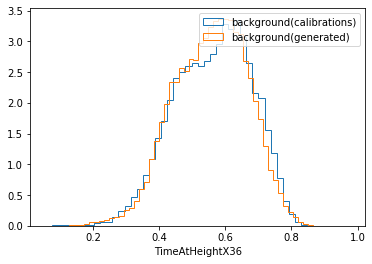

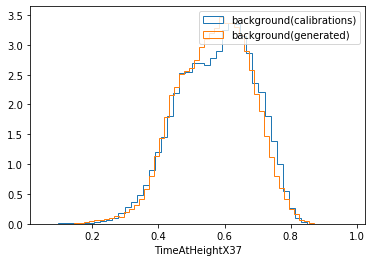

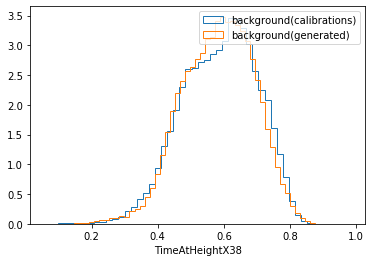

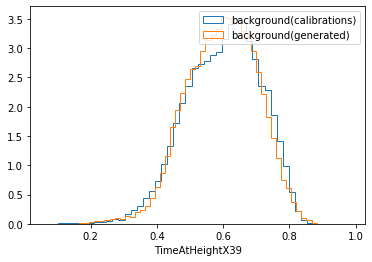

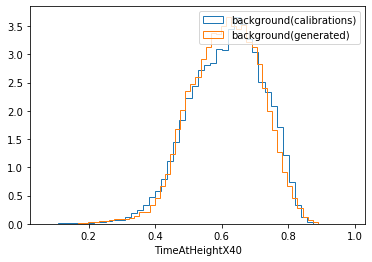

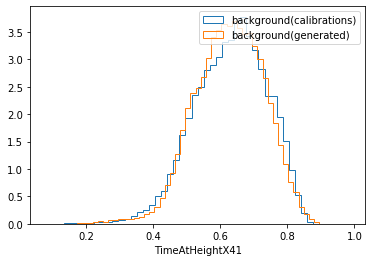

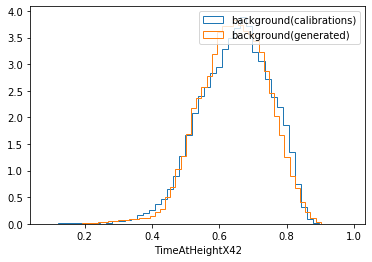

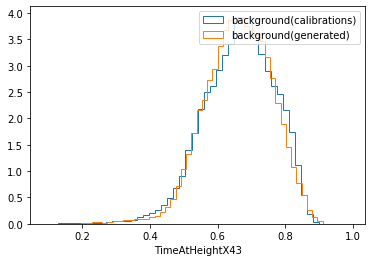

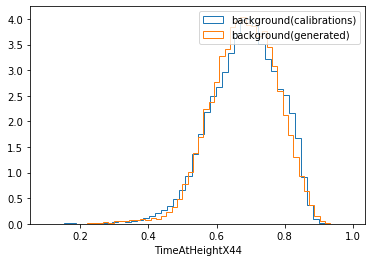

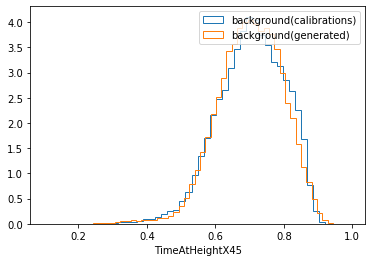

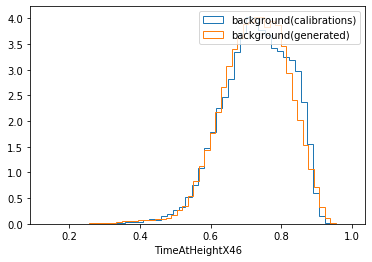

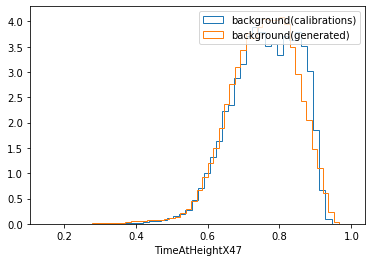

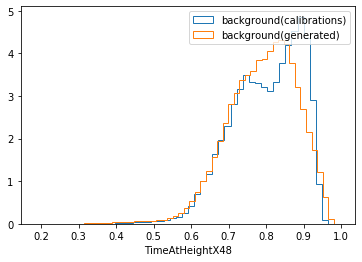

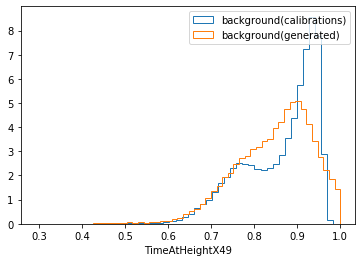

In [21]:
string = 'TimeAtHeightX'
for i in range(2,50):

    x1=bkg_cal[string+str(i)]
    x2 =bkg_gen[string+str(i)]

    plt.hist(x1, bins = 50, label='background(calibrations)', histtype = 'step', density=True)
    plt.hist(x2, bins = 50, label = 'background(generated)', histtype = 'step',density=True)
    plt.legend()
    plt.xlabel(string+str(i))
    plt.show()

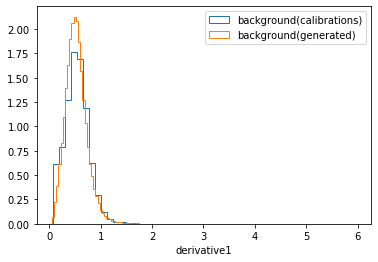

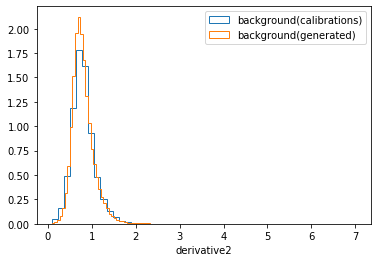

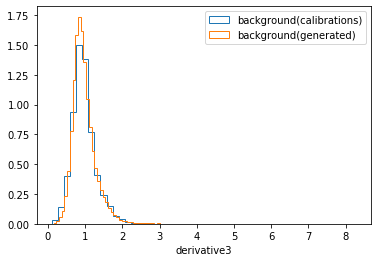

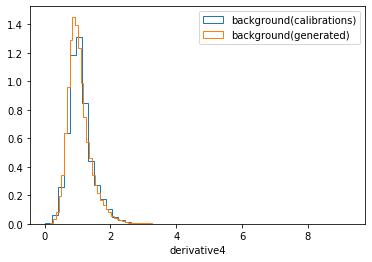

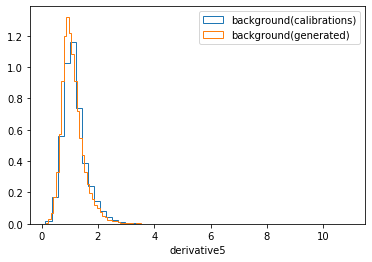

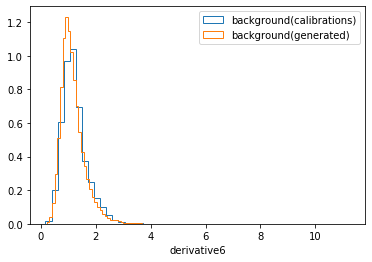

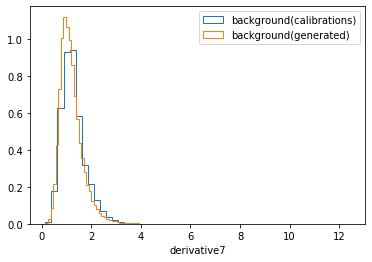

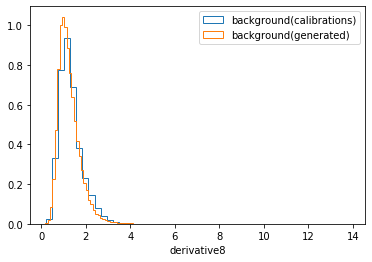

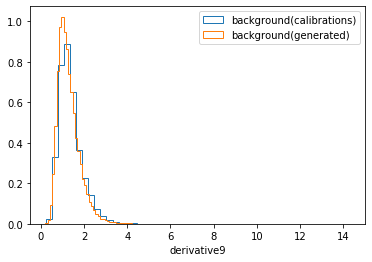

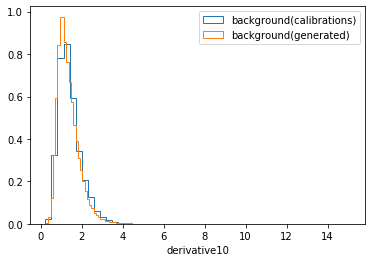

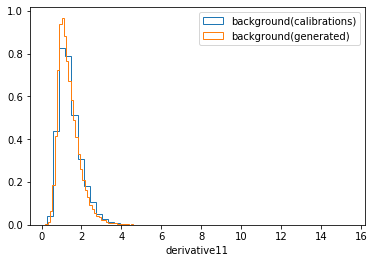

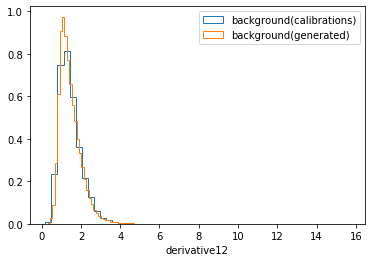

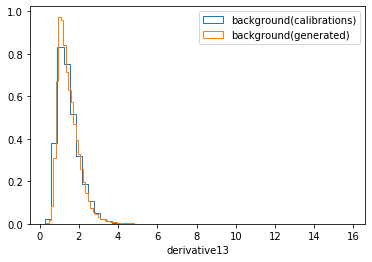

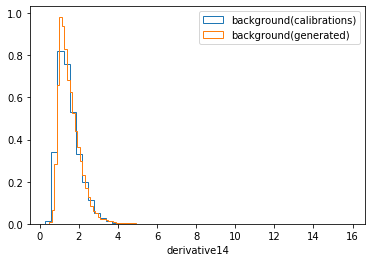

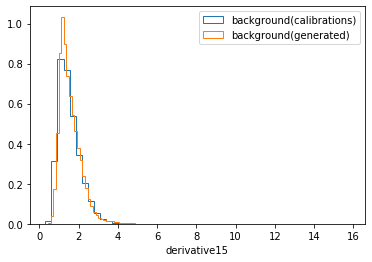

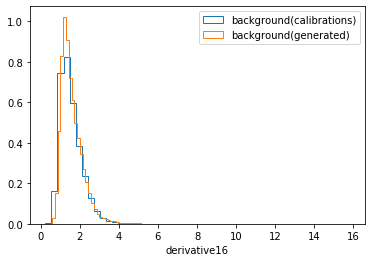

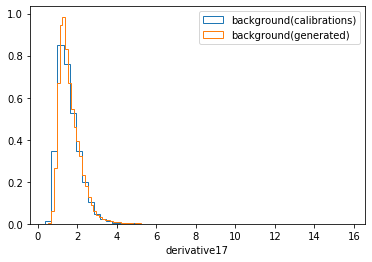

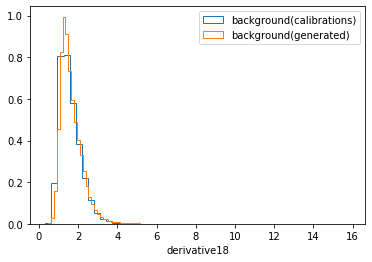

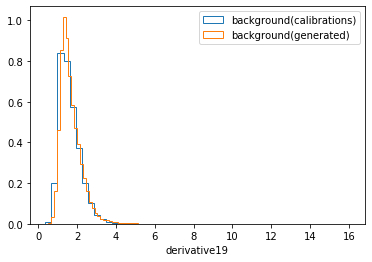

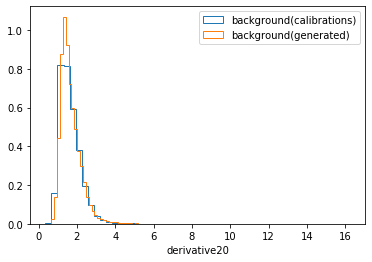

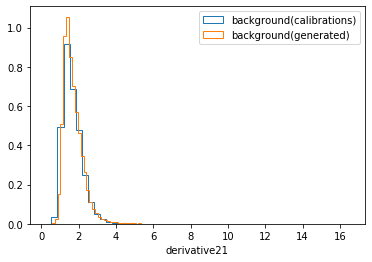

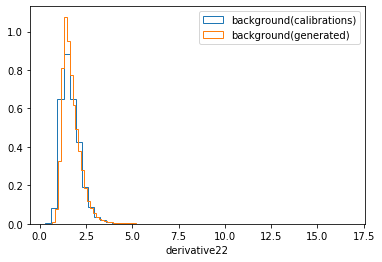

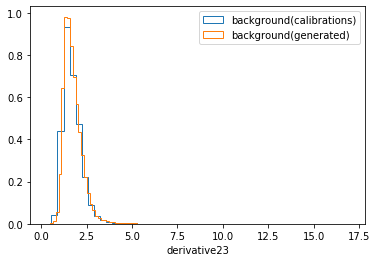

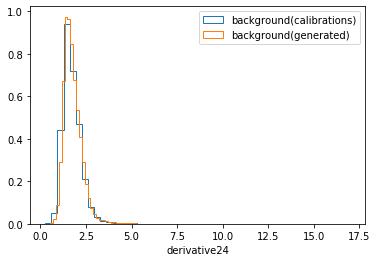

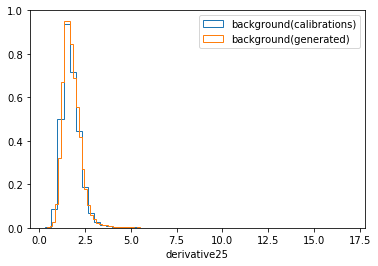

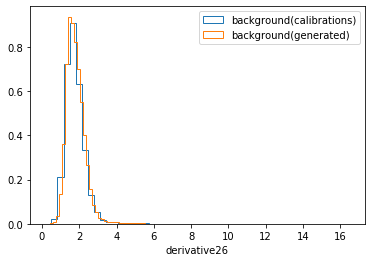

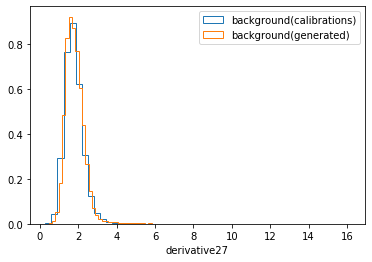

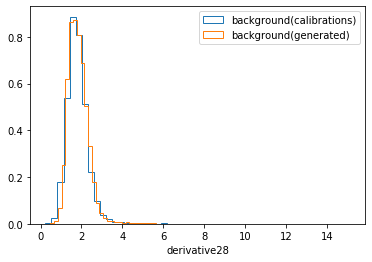

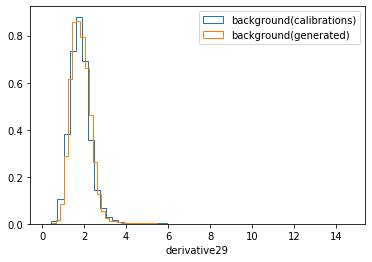

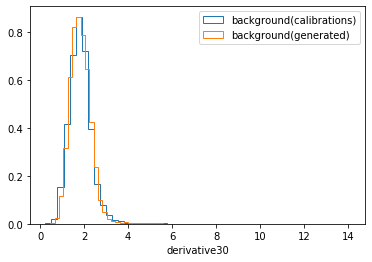

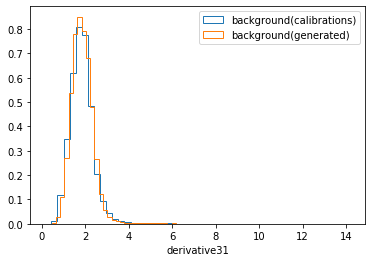

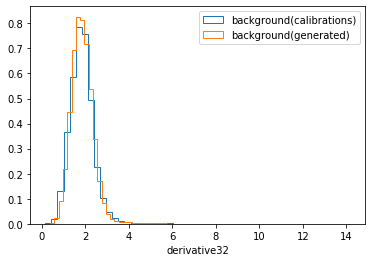

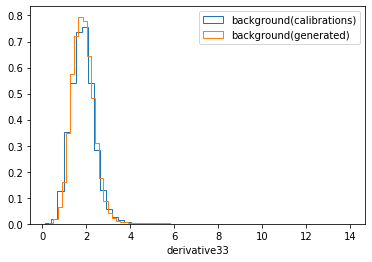

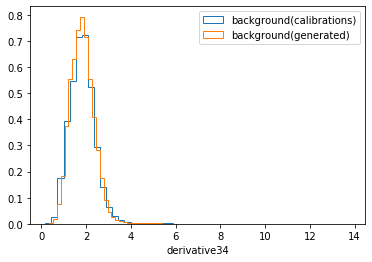

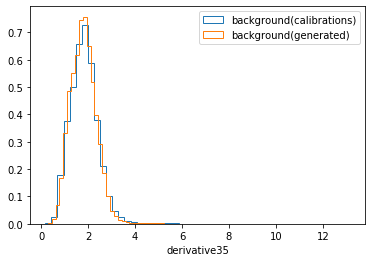

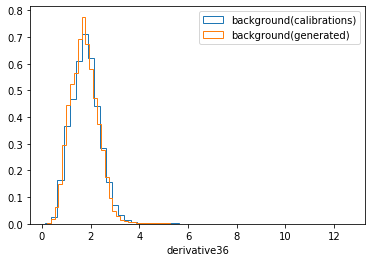

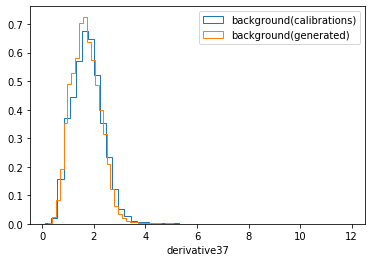

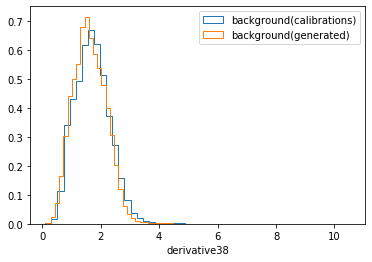

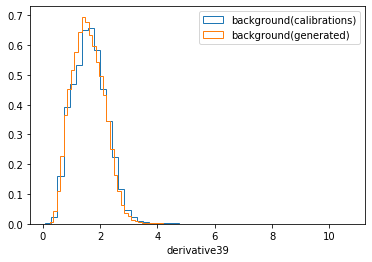

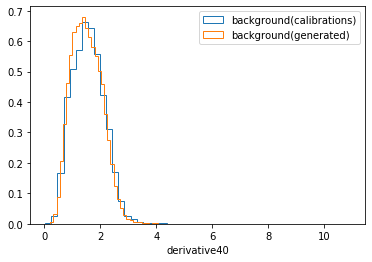

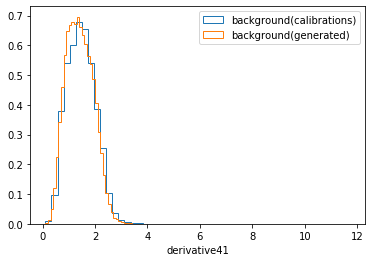

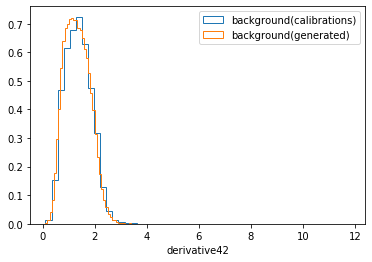

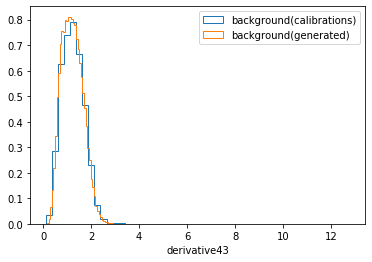

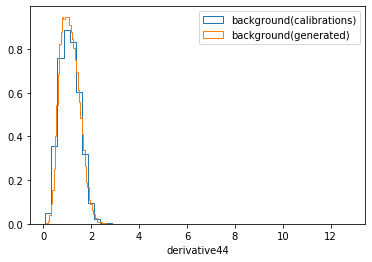

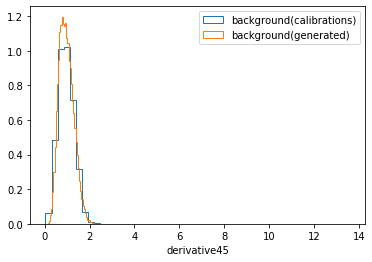

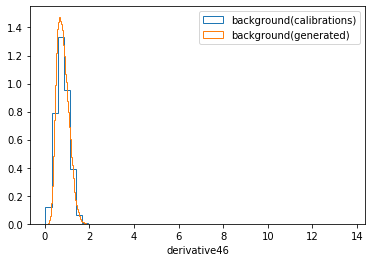

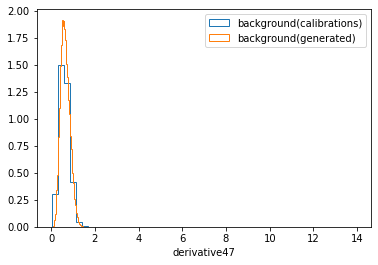

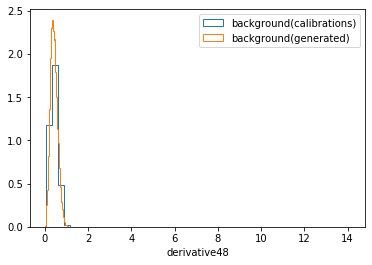

In [47]:
string = 'derivative'
for i in range(1,49):

    x1=bkg_cal[string+str(i)]
    x2 =bkg_gen[string+str(i)]

    plt.hist(x1, bins = 50, label='background(calibrations)', histtype = 'step', density=True)
    plt.hist(x2, bins = 50, label = 'background(generated)', histtype = 'step',density=True)
    plt.legend()
    plt.xlabel(string+str(i))
    plt.show()